In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
from datetime import date, time, datetime

import holidays
warnings.filterwarnings('ignore')

In [2]:
files = [file for file in os.listdir('./Sales')]
all_datasets = pd.DataFrame()
for file in files:
    df = pd.read_csv('Sales/'+file)
    all_datasets = pd.concat([all_datasets, df])
all_datasets.to_csv('all_data.csv', index=False)

In [3]:
all_data = pd.read_csv('all_data.csv')

In [4]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Ключевые задачи анализа данных:
1. Узнать, какие товары продаются чаще всего.
2. Исследовать зависимость продаж от времени.
3. Изучить влияние праздников на продажи


## 1. Избавимся от None значений

In [5]:
all_data.isnull().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
all_data.dropna(inplace=True)

In [7]:
all_data.dtypes

Order ID            object
Product             object
Quantity Ordered    object
Price Each          object
Order Date          object
Purchase Address    object
dtype: object

## 2. Преобразуем данные к нужным типам 

In [8]:
all_data['Price Each'].unique()

array(['11.95', '99.99', '600', '11.99', '1700', '14.95', '389.99',
       '3.84', '150', '2.99', '700', '300', '149.99', '109.99', '600.0',
       '999.99', '400', '379.99', 'Price Each', '700.0', '1700.0',
       '150.0', '300.0', '400.0'], dtype=object)

In [9]:
all_data.drop(all_data[all_data['Price Each'] == 'Price Each'].index, inplace=True)

In [10]:
all_data['Price Each'] = all_data['Price Each'].astype('float')
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype('int32')

In [11]:
all_data.dtypes

Order ID             object
Product              object
Quantity Ordered      int32
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

## 3. Переименуем столбцы, чтобы убрать пробелы и заглавные буквы

In [12]:
all_data.rename(columns={"Price Each": "Price_Each", "Order Date": "Order_Date", 'Purchase Address': 'Purchase_Address', 'Quantity Ordered':'Quantity_Ordered'}, inplace=True)
all_data.rename(str.lower, axis='columns', inplace=True)

In [13]:
all_data

,order id,product,quantity_ordered,price_each,order_date,purchase_address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


## 4. Добавим новые атрибуты

In [14]:
all_data['total'] = all_data['price_each'] * all_data['quantity_ordered']

### Преобразуем столбец order_date из строки в формат datetime, а также добавим отдельные стобцы с месяцем, годом, днем недели, часом заказа

In [15]:
all_data['order_date'] = all_data['order_date'].apply(lambda x: datetime.strptime(x, '%m/%d/%y %H:%M'))

In [16]:
all_data['year'] = all_data['order_date'].apply(lambda x: x.year)
all_data['month'] = all_data['order_date'].apply(lambda x: x.month)
all_data['hour'] = all_data['order_date'].apply(lambda x: x.hour)
all_data['weekday'] = all_data['order_date'].apply(lambda x: x.isoweekday())

In [17]:
all_data

,order id,product,quantity_ordered,price_each,order_date,purchase_address,total,year,month,hour,weekday
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",23.90,2019,4,8,5
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",99.99,2019,4,22,7
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",600.00,2019,4,14,5
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",11.99,2019,4,14,5
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",11.99,2019,4,9,2
...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",8.97,2019,9,20,2
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",700.00,2019,9,16,7
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",700.00,2019,9,7,1
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",379.99,2019,9,17,4


### Добавим столбец "holiday", в котором будет название празника, если день покупки является праздником, или же значение None

In [18]:
all_data.year.unique()
holi_dict = holidays.US(years=[2019, 2020])
all_data['holiday'] = all_data['order_date'].apply(lambda x: holi_dict.get(x.date(), 'Not holiday'))

### Создаём столбцы City и State

In [19]:
def get_city(address):                    #Функция для извлечения города
    return address.split(',')[1] 
def get_state(address):                   #Функция для извлечения штата
    return address.split(',')[2].split()[0]

all_data['city'] = all_data['purchase_address'].apply(lambda x: get_city(x) + ' ' + get_state(x)) 
all_data['state'] = all_data['purchase_address'].apply(lambda x: get_state(x)) 

## 5. Начнём разведочный анализ данных

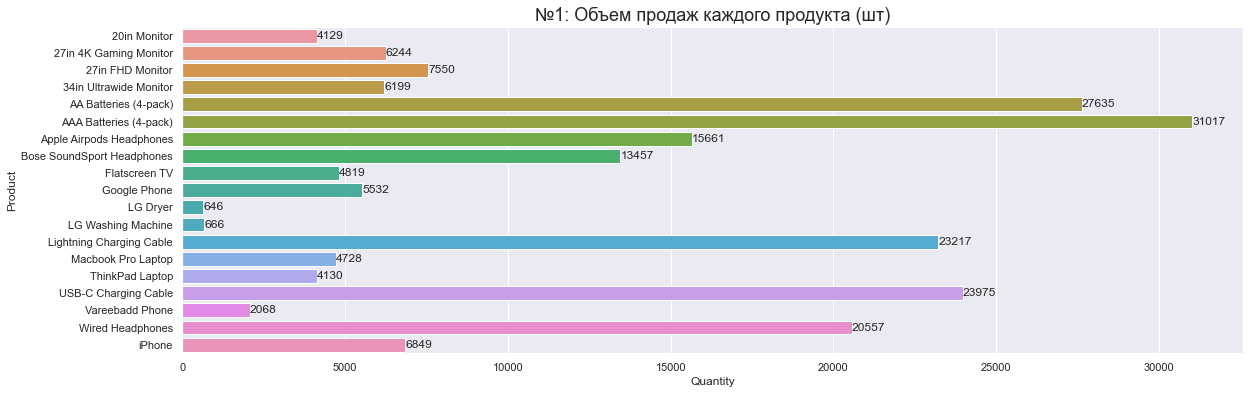

In [29]:
df1 = all_data.groupby('product')['quantity_ordered'].sum().reset_index()
ax = sns.barplot(y=df1['product'], x=df1['quantity_ordered'])
ax.bar_label(ax.containers[0])
sns.set(rc={'figure.figsize':(15,6)})
ax.set(ylabel='Product', xlabel='Quantity')
plt.title('№1: Объем продаж каждого продукта (шт)').set_fontsize('18')
plt.show()

Как видно на диаграмме №1, Наиболее продаваемые товары - батарейки АА и ААА, зарядные кабели USB-C и Lightning

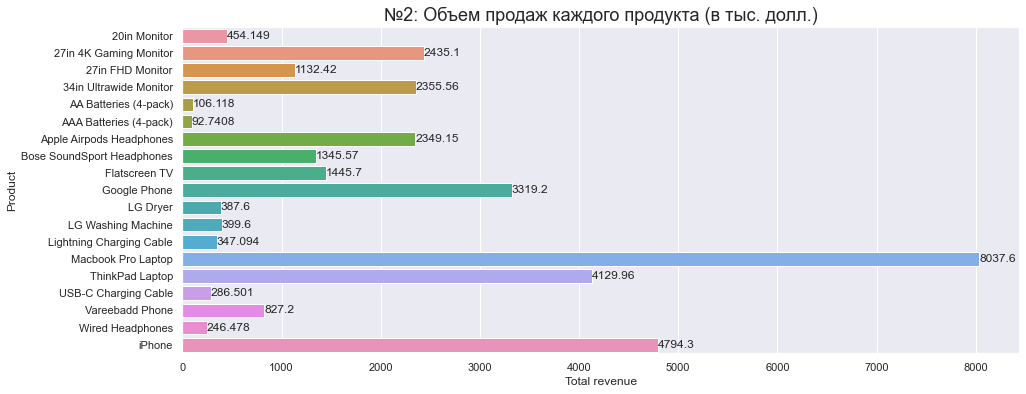

In [30]:
df2 = all_data.groupby('product')['total'].sum().reset_index()
df2['total'] = df2['total']/1000
ax = sns.barplot(y=df2['product'], x=df2['total'])
ax.bar_label(ax.containers[0])
sns.set(rc={'figure.figsize':(15,6)})
ax.set(ylabel='Product', xlabel='Total revenue')
plt.title('№2: Объем продаж каждого продукта (в тыс. долл.)').set_fontsize('18')
plt.show()

Диаграмма №2 показывает, что наиболее прибыльные товары:
1. MacBook Pro
2. iPhone
3. Lenovo ThinkPad
4. Google Phone
5. 27-дюймовый 4К игровой монитор

### Теперь сравним продажи по месяцам, часам и дням недели

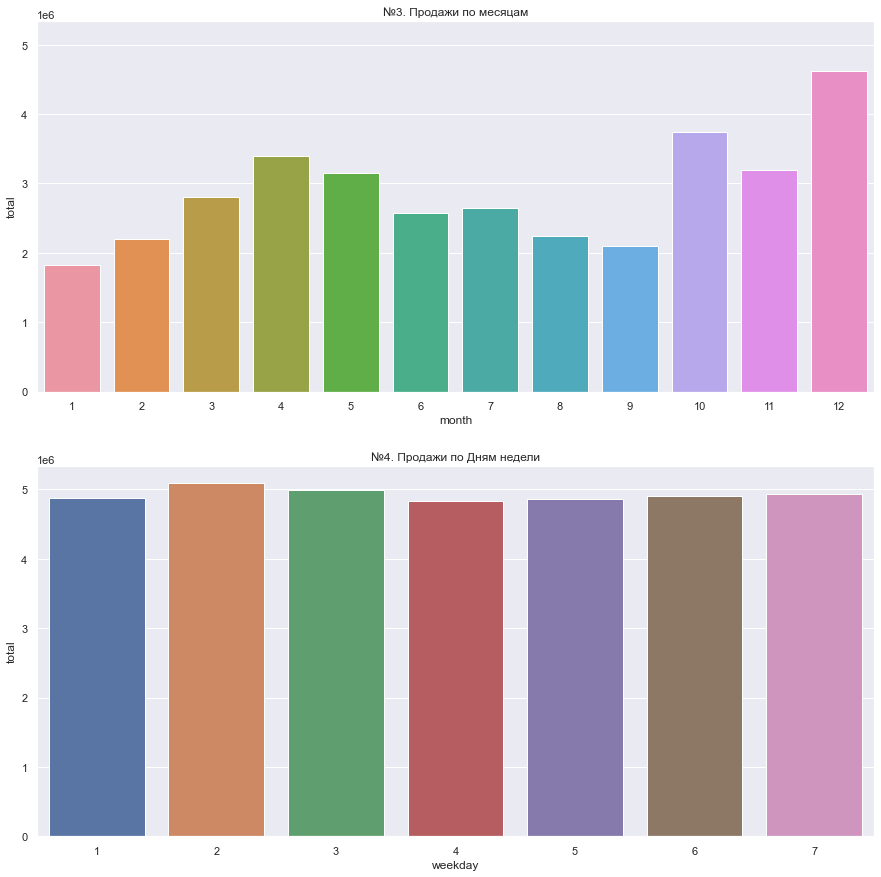

In [22]:
fig, axes = plt.subplots(2, 1, figsize=(15, 15), sharey=True)
df_month = all_data.groupby('month')['total'].sum().reset_index()
df_weekday = all_data.groupby('weekday')['total'].sum().reset_index()
sns.barplot(ax=axes[0], x=df_month['month'], y=df_month['total']).set(title='№3. Продажи по месяцам')
sns.barplot(ax=axes[1], x=df_weekday['weekday'], y=df_weekday['total']).set(title='№4. Продажи по Дням недели')
plt.show()

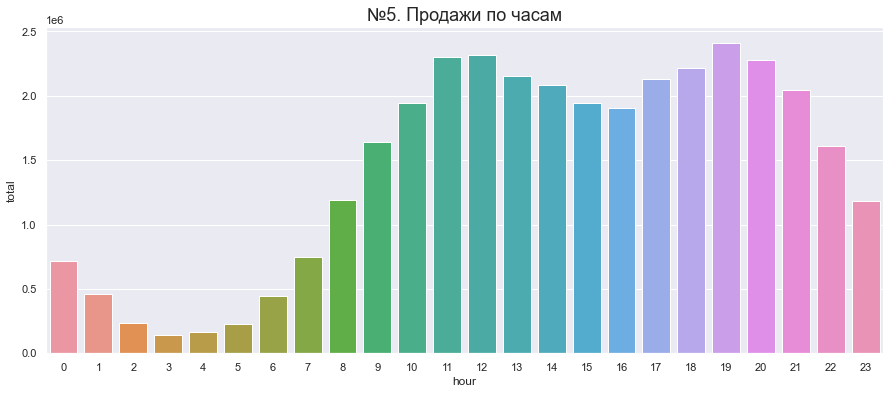

In [23]:
df_hour = all_data.groupby('hour')['total'].sum().reset_index()
sns.barplot(x=df_hour['hour'], y=df_hour['total'])
plt.title('№5. Продажи по часам').set_fontsize('18')
plt.show()

1. По диаграмме №3 (продажи помесяцам), можно сделать вывод, что наибольшее количество покупок приходится на декабрь, что может быть вызвано новогодними праздниками.
2. По диаграмме №4 (продажи по дням недели) можно заметить, что объем продаж в течение недели находится примерно на одном уровне.
3. По диаграмме №5 (продажи по часам) можно заметить, что пик продаж приходится на интервалы 11-14 часов и 18-21 час. 

### Информация о росте прадаж во время новогодних празднииков наталкнула на мысль: исследовать продажи в обычные и праздничные дни.

In [24]:
df_holidays = all_data
df_holidays['order_day'] = df_holidays['order_date'].apply(lambda x: x.date())
df_hol_gr = df_holidays.groupby(['order_day', 'holiday'])['total'].sum().reset_index()
df_hol_gr1 = df_hol_gr.groupby('holiday').mean().round().reset_index()

In [25]:
df_hol_gr1 

,holiday,total
0,Christmas Day,152268.0
1,Columbus Day,128103.0
2,Independence Day,102135.0
3,Labor Day,72275.0
4,Martin Luther King Jr. Day,60948.0
5,Memorial Day,95638.0
6,New Year's Day,37176.0
7,Not holiday,94420.0
8,Thanksgiving,95941.0
9,Veterans Day,110946.0


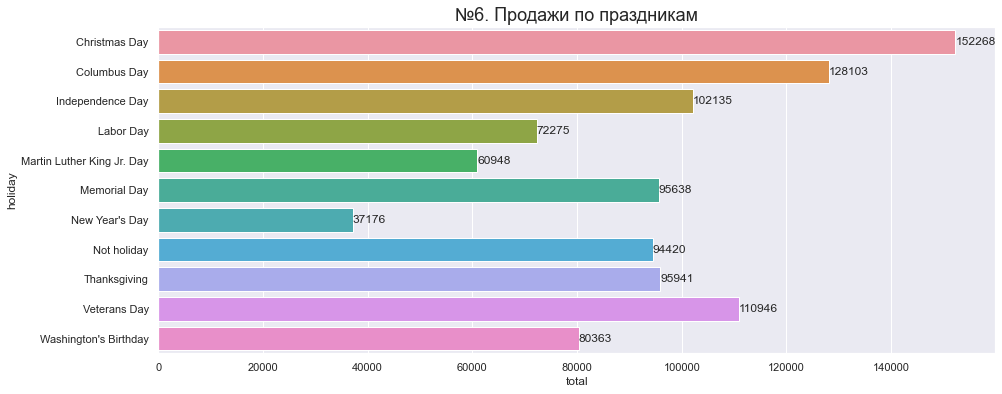

In [26]:
ax = sns.barplot(y=df_hol_gr1['holiday'], x=df_hol_gr1['total'])
plt.title('№6. Продажи по праздникам').set_fontsize('18')
ax.bar_label(ax.containers[0])
sns.set(rc={'figure.figsize':(19,6)})
plt.show()

По диаграмме №6 можно сделать вывод, максимальная выручка наблюдается в рождество. Также рост продаж наблюдается в день Колумба, день ветеранов и день независимости.
Примечательно, что в день нового года продажи наиболее низкие, так как наблюдается спад продаж после рождества.

In [27]:
df_christmas = all_data.query('holiday == "Christmas Day"').groupby('product')['quantity_ordered'].sum().reset_index()
df_christmas['percentage_christmas'] = (df_christmas['quantity_ordered']/ (df_christmas['quantity_ordered'].sum())) * 100
df_avg = all_data.query('holiday == "Not holiday"').groupby('product')['quantity_ordered'].sum().reset_index()
df_avg['percentage'] = (df_avg['quantity_ordered']/ (df_avg['quantity_ordered'].sum())) * 100

In [37]:
df_all = pd.merge(left=df_christmas['percentage_christmas'], right=df_avg['percentage'], left_on=df_christmas['product'], right_on=df_avg['product'])
df_all.rename(columns={"key_0": "product"}, inplace=True)

### Сравним продажи по отдельным товарам на рождество и в обычные дни

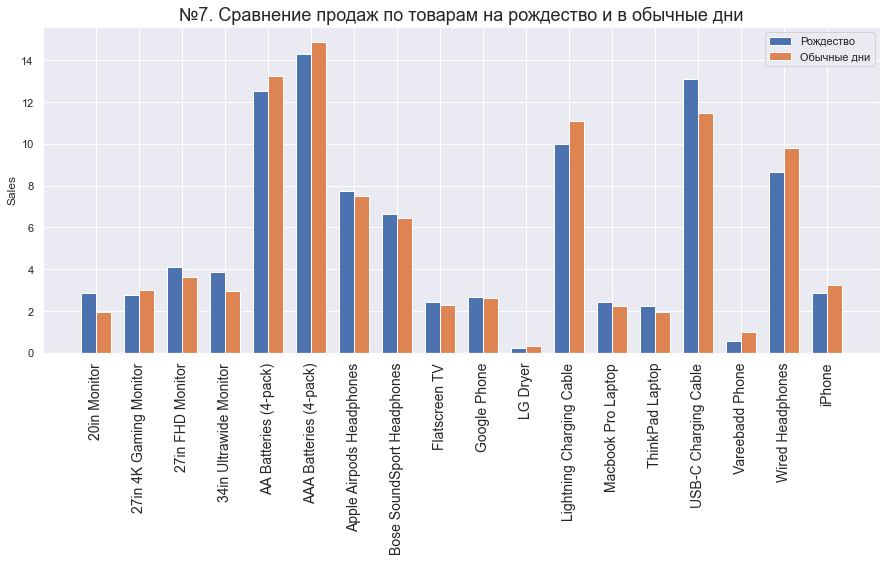

In [39]:

fig, ax = plt.subplots()
width = 0.35 
x = np.arange(len(df_all['product'])) 
rects1 = ax.bar(x - width/2, df_all['percentage_christmas'], width, label='Рождество')
rects2 = ax.bar(x + width/2, df_all['percentage'], width, label='Обычные дни')

ax.set_ylabel('Sales')
ax.set_title('№7. Сравнение продаж по товарам на рождество и в обычные дни').set_fontsize('18')
ax.set_xticks(x, df_all['product'], rotation='vertical', size=14)
ax.legend()


plt.show()

На основе диаграммы №7 можно понять, что в период рождества наблюдается повышенный спрос на товары:
- зарядные кабели USB-C, 
- 20, 27, 34-дюймовые мониторы
- наушники AirPods и Bose 
- ноутбуки Lenovo и MacBook
- плоские телевизоры.

В обычные дни повышенный спрос на товары:
- АА и ААА батарейки
- Зарядные кабели Lightning
- Проводные наушники
- iPhone

**Рекомендация: изменить рекламную кампанию перед рождеством - сделать акцент на мониторах, ноутбуках, наушники и плоские телевизоры**

### Найдем наиболее популярные комбинации товаров: какие товары часто покупатели покупают вместе?

In [40]:
dup = all_data.groupby(['hour', 'product']).sum()
dup = all_data[all_data['order id'].duplicated(keep=False)]
dup['grouped'] = dup.groupby('order id')['product'].transform(lambda x: ','.join(x))
dup = dup[['order id', 'grouped']].drop_duplicates()

In [41]:
from itertools import combinations
from collections import Counter

combination_items = {'combination':[], 'number':[]}
count = Counter()
for row in dup['grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
    
for key, value in count.most_common(10):
    combination_items['combination'].append(key)
    combination_items['number'].append(value)

In [42]:
combination_items = pd.DataFrame(combination_items)
items_list = []
for item in combination_items['combination']:
    items_list.append(item[0] + ' + ' + item[1])
combination_items.to_csv('combination_items.csv')      

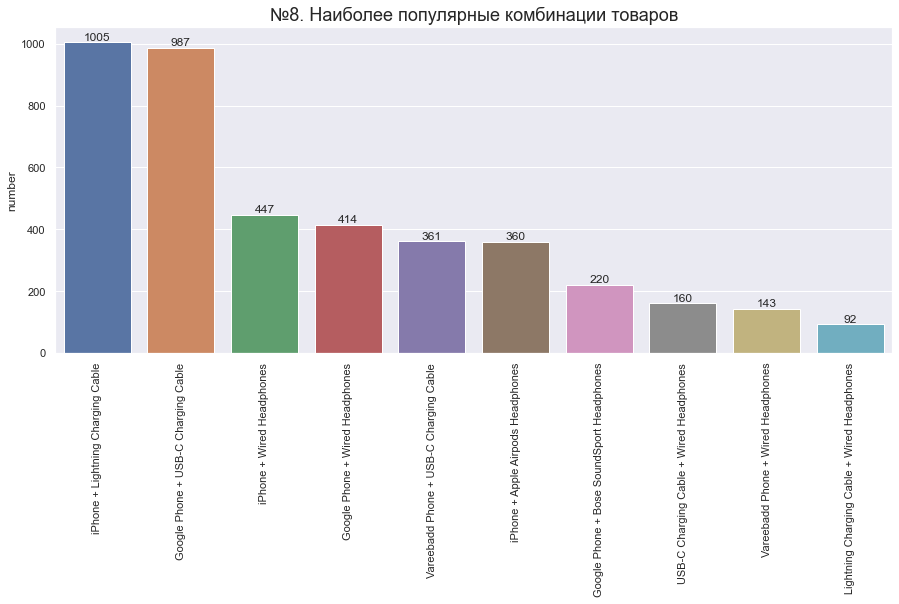

In [43]:
ax = sns.barplot(x=items_list, y=combination_items['number'])
ax.tick_params(axis='x', rotation=90)
ax.set_title('№8. Наиболее популярные комбинации товаров').set_fontsize('18')
ax.bar_label(ax.containers[0])
plt.show()

По диаграмме №8 можно понять, что наиболее популярные комбинации товаров:
- iPhone + кабель Lightning
- Google Phone + кабель USB-C
- iPhone + проводные наушники
- Google Phone + проводные наушники
- Varedbadd Phone + кабель USB-C
- iPhone + наушники AirPods

**Рекомендация: сделать скидку на наушники и зарядный кабель при покупке смартфонов**

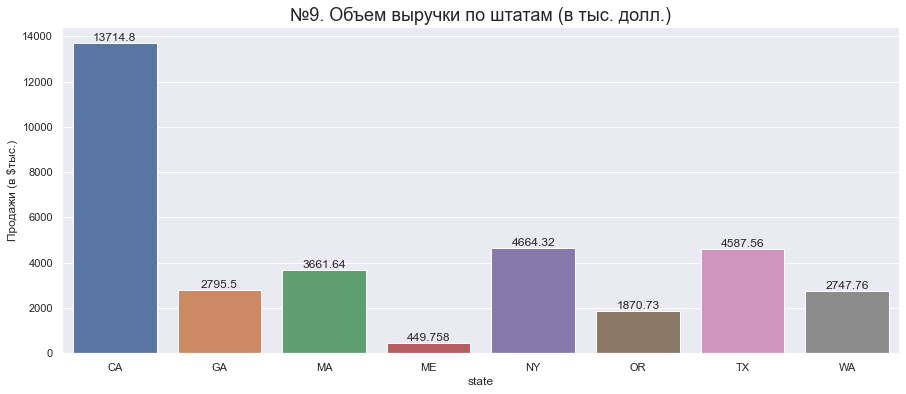

In [44]:
df_states = all_data.groupby('state')['total'].sum().reset_index()
df_states['total'] = df_states['total'] / 1000
ax = sns.barplot(x=df_states['state'], y=df_states['total'])
ax.set_title('№9. Объем выручки по штатам (в тыс. долл.)').set_fontsize('18')
ax.bar_label(ax.containers[0])
ax.set_ylabel('Продажи (в $тыс.)')
plt.show()

Наибольшую выручку приносят заказы из штата Калифорния.  
**Рекомендация: изменить маркетинговую и рекламную политику в пользу других штатов**

### Выводы и рекомендации:
#### 1. В праздничные дни продажи выше, чем в обычные дни;
#### 2. Наиболее часто продаваемый товар: батарейки, однако наибольшую прибыль приносят ноутбуки, телефоны и мониторы;
#### 3. Самое популярное время для покупок: 11-14 часов и 18-21 час. Самый прибыльный месяц - декабрь;
#### 4. В праздничные дни наиболее популярные товары: мониторы, зарядные кабели USB-C, AirPods, ноутбуки;
#### 5. Самые популярные комбинации товаров - зарядные кабели и наушники со смартфонамиl
#### 6. Большую часть выручки приносят продажи в штате Калифорния.